imports

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [3]:
#loading dataset
credit_data = pd.read_csv('/content/creditcard.csv')

In [4]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_data.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
credit_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
credit_data['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

0->normal transaction
1->fraudulant transaction

In [9]:
#separating data for analysis
legit = credit_data[credit_data.Class == 0]
fraud = credit_data[credit_data.Class == 1]


In [10]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
#statistical measures
legit.Amount.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
#comparing legitimate and fraudulant transactions
credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


under sampling

In [14]:
legit_sample = legit.sample(n=492)

In [15]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [16]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
47984,43446.0,-1.244502,0.574682,1.645834,-0.842826,1.298392,1.249265,0.478876,0.377736,-0.355780,...,-0.081473,0.040785,0.077028,-1.037192,-0.535953,0.008952,-0.063548,-0.046159,1.99,0
266991,162570.0,-2.192001,0.757258,-1.843389,-5.071655,0.259777,0.334840,-0.259076,1.127400,0.633220,...,0.042140,1.015719,0.000684,-0.740021,-0.052565,-0.820442,0.596959,0.404117,25.20,0
204085,135105.0,-1.365857,2.091591,-2.018566,-0.315336,-0.196429,-0.785034,0.118969,0.933194,-0.602826,...,0.454922,1.063333,-0.099319,-0.540909,-0.233095,-0.173791,-0.478271,-0.051400,55.25,0
53513,46019.0,-1.055774,0.976951,2.438817,0.994608,-0.709924,0.722295,-0.350310,0.843449,-0.272825,...,0.178557,0.548720,-0.092439,0.092356,0.054431,-0.225266,0.030780,0.028012,22.00,0
197263,131926.0,-0.534247,0.901247,0.920950,-0.592458,0.449821,-0.061410,0.430585,0.159879,0.262559,...,0.144898,0.658365,-0.275634,0.566266,-0.036160,0.607837,0.354114,0.231042,18.10,0


In [17]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94672.099593,0.157929,-0.014021,0.051326,-0.095108,0.032848,0.038295,0.008609,-0.003581,0.016145,...,0.032568,0.022438,0.014409,-0.021732,0.017124,-0.030106,-0.002497,-0.006907,0.006122,89.418110
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


dropping the class coloumn

In [19]:
x=new_dataset.drop(columns='Class', axis=1)
y=new_dataset['Class']

In [20]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
47984    43446.0 -1.244502  0.574682  1.645834 -0.842826  1.298392  1.249265   
266991  162570.0 -2.192001  0.757258 -1.843389 -5.071655  0.259777  0.334840   
204085  135105.0 -1.365857  2.091591 -2.018566 -0.315336 -0.196429 -0.785034   
53513    46019.0 -1.055774  0.976951  2.438817  0.994608 -0.709924  0.722295   
197263  131926.0 -0.534247  0.901247  0.920950 -0.592458  0.449821 -0.061410   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [21]:
print(y)

47984     0
266991    0
204085    0
53513     0
197263    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


splitting data

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [23]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


In [24]:
print(y.shape, y_train.shape, y_test.shape)

(984,) (787,) (197,)


model training

In [25]:
model = LogisticRegression(solver='liblinear')

In [26]:
#training the model
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

evaluation

In [27]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
training_data_precision = precision_score(x_train_prediction, y_train)
training_data_recall = recall_score(x_train_prediction, y_train)
training_data_f1 = f1_score(x_train_prediction, y_train)

In [28]:
print('Accuracy on training data : ', training_data_accuracy)
print('Precision on training data : ', training_data_precision)
print('Recall on training data : ', training_data_recall)
print('F1 Score on training data : ', training_data_f1)

Accuracy on training data :  0.9491740787801779
Precision on training data :  0.9187817258883249
Recall on training data :  0.9783783783783784
F1 Score on training data :  0.9476439790575916


In [29]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
test_data_precision = precision_score(y_test, x_test_prediction)
test_data_recall = recall_score(x_test_prediction, y_test)
test_data_f1 = f1_score(x_test_prediction, y_test)


In [30]:
print('Accuracy on test data : ', test_data_accuracy)
print('Precision on test data : ', test_data_precision)
print('Recall on test data : ', test_data_recall)
print('F1 Score on test data : ', test_data_f1)

Accuracy on test data :  0.9035532994923858
Precision on test data :  0.9247311827956989
Recall on test data :  0.9247311827956989
F1 Score on test data :  0.900523560209424


Visualization


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

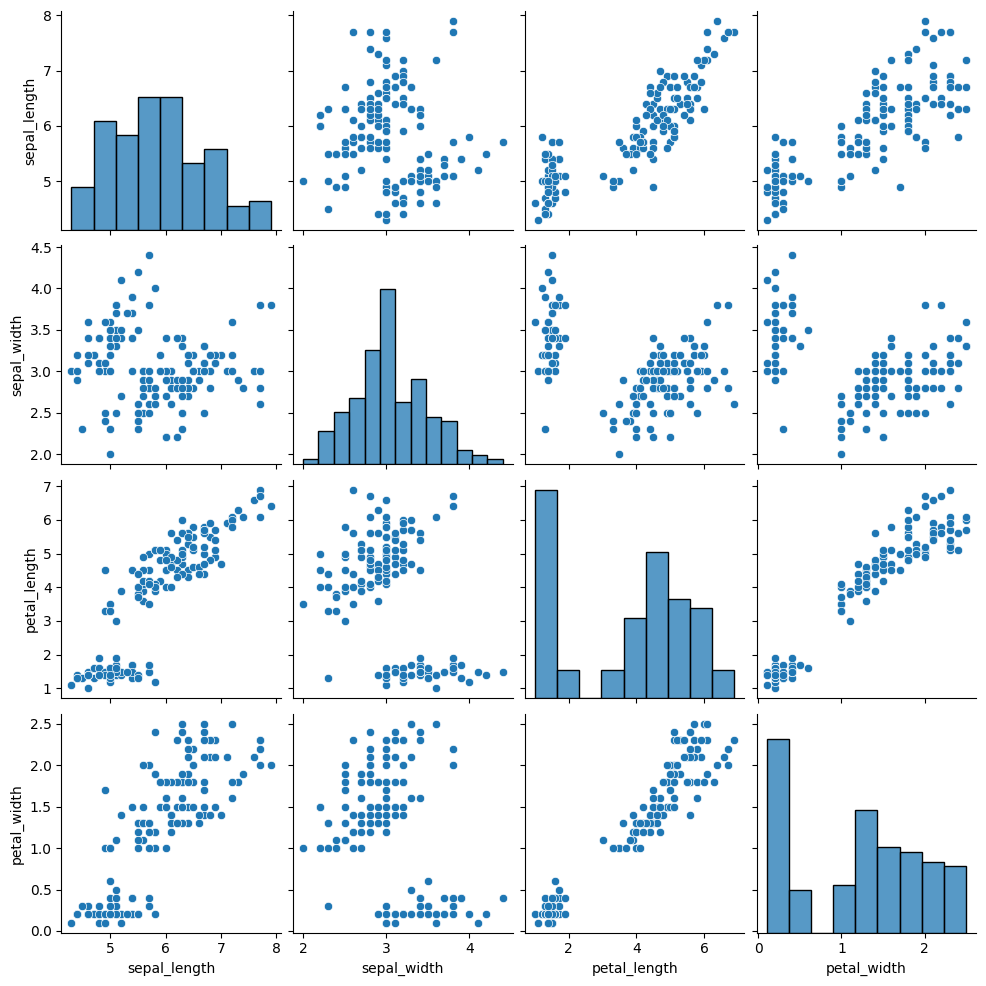

In [40]:
credit_data = sns.load_dataset('iris')

sns.pairplot(credit_data)
plt.show()